#  Simulation Multi-Agent avec tentative d'empathie

!! attention !! les fichiers du dossier n'apparaissant ici sont des fichiers test ou passés qui ne servent plus à l'éxcution des simulations 

## Vue d'Ensemble

Le projet implémente un système d'apprentissage par renforcement multi-agent (MARL) où plusieurs agents interagissent dans un environnement de type grille pour collecter des ressources. La particularité est que la récompense de chaque agent dépend non seulement de sa propre consommation (satisfaction personnelle) mais aussi de celle des autres agents (empathie). 

L'architecture est modulaire et se compose de plusieurs fichiers:

1. `env.py` - Définit l'environnement
2. `agents.py` - Définit la structure des agents
3. `policies.py` - Implémente les algorithmes d'apprentissage (Q-Learning et DQN)
4. `marl_simulation.py` - Orchestre la simulation
5. `analyze_results.py` - Analyse et visualise les résultats

## 1. Environnement (`env.py`)

L'environnement est une grille 2D contenant des agents et des ressources:

- **`GridMaze`** (classe de base):
  - Définit une grille de taille configurable
  - Gère le déplacement des agents (UP, DOWN, LEFT, RIGHT, EXPLOIT)
  - Suit les positions des agents et les récompenses

- **`RandomizedGridMaze`** (classe dérivée):
  - Ajoute des ressources aléatoires dans la grille
  - Configure le comportement des ressources (apparition, consommation)
  - Permet de choisir si les ressources sont consommées automatiquement ou seulement via l'action EXPLOIT

L'environnement maintient l'état du système à chaque pas de temps et peut être réinitialisé pour un nouvel épisode.

## 2. Agents (`agents.py`)

La classe `Agent` encapsule les caractéristiques et comportements fondamentaux des agents:

- Stocke la position courante de l'agent
- Maintient un historique des repas sous forme d'une file circulaire (`deque`)
- Compte le nombre total de repas
- Fournit des méthodes pour enregistrer de nouveaux repas et calculer des statistiques

Chaque agent peut avoir une capacité de mémoire différente, ce qui affecte la longueur de son historique de repas.

## 3. Politiques d'Apprentissage (`policies.py`)

Ce fichier contient les algorithmes d'apprentissage par renforcement:

- **`QAgent`**: Implémentation du Q-Learning classique
  - Utilise une table pour stocker les valeurs Q
  - Utilise une politique epsilon-greedy pour l'exploration/exploitation
  - Met à jour les valeurs Q basées sur l'équation de Bellman

- **`DQNAgent`**: Implémentation du Deep Q-Network
  - Utilise des réseaux de neurones pour approximer la fonction Q
  - Implémente un buffer de replay pour l'apprentissage par lots
  - Utilise un réseau cible pour stabiliser l'apprentissage

- **`EmotionalModel`** et **`SocialRewardCalculator`**: 
  - Calculent les récompenses basées sur l'empathie
  - Pondèrent entre la satisfaction personnelle et celle des autres agents
  - Prennent en compte l'historique des repas et le dernier repas

- **`ReplayBuffer`**: 
  - Stocke les expériences (état, action, récompense, état suivant, terminal)
  - Échantillonne des lots d'expériences pour l'apprentissage

## 4. Simulation Principale (`marl_simulation.py`)

Ce fichier orchestre tout le processus d'apprentissage:

- Initialise l'environnement et les agents
- Crée des agents RL (Q-Learning ou DQN) selon le choix de l'algorithme
- Exécute des épisodes complets avec les étapes:
  1. Réinitialisation de l'environnement
  2. Sélection d'actions par les agents
  3. Exécution des actions dans l'environnement
  4. Calcul des récompenses sociales en fin d'épisode
  5. Apprentissage des agents
- Collecte des statistiques pour analyse
- Visualise l'environnement et les performances des agents

La méthode `get_state_representation` convertit l'état de la grille en une représentation adaptée à l'apprentissage par renforcement: position normalisée de l'agent et informations sur les ressources environnantes.

## 5. Analyse des Résultats (`analyze_results.py`)

Ce fichier fournit des outils pour:
- Exécuter des expériences avec différentes configurations (algorithmes, paramètres)
- Visualiser les courbes d'apprentissage
- Analyser la convergence des différents algorithmes
- Comparer les performances en termes de bien-être social et de récompenses individuelles

## Aspects Techniques Clés

### 1. Représentation d'État

Les états sont représentés comme des vecteurs de caractéristiques incluant:
- Position normalisée de l'agent (i, j divisés par la taille de la grille)
- Valeurs des ressources dans les 8 directions autour de l'agent

### 2. Modèle d'Empathie

Le modèle d'empathie est paramétré par deux coefficients:
- `alpha`: Équilibre entre satisfaction personnelle (1.0) et empathie (0.0)
- `beta`: Pondération entre le dernier repas et l'historique complet

### 3. Système de Récompense

À la fin de chaque épisode, la récompense finale comprend:
- Satisfaction personnelle = `beta` × (dernier repas) + (1-`beta`) × (moyenne de l'historique)
- Récompense émotionnelle = `alpha` × (satisfaction personnelle) + (1-`alpha`) × (moyenne des satisfactions des autres)

### 4. Gestion des Erreurs et Débogage

Le code inclut un système robuste de gestion des erreurs pour:
- Tracer les problèmes liés aux types de données et aux conversions
- Afficher des informations détaillées sur les états, actions et récompenses
- Continuer l'apprentissage même en cas d'erreur dans un épisode

## Paramétrisation et Flexibilité

Le système est hautement configurable:
- Taille de l'environnement
- Nombre d'agents
- Densité et dynamique des ressources
- Algorithme d'apprentissage (Q-Learning vs DQN)
- Paramètres d'empathie (alpha, beta)
- Hyperparamètres d'apprentissage (taux d'apprentissage, facteur d'actualisation, exploration)

Cette flexibilité permet de tester diverses hypothèses et configurations pour trouver les combinaisons optimales pour votre recherche MARL.

## Conclusion


Épisode 10, Q-learning: 0.64, Random: -0.50, epsilon: 0.020
Épisode 20, Q-learning: 0.89, Random: -0.50, epsilon: 0.010
Épisode 30, Q-learning: 0.89, Random: -0.50, epsilon: 0.010
Épisode 40, Q-learning: 0.91, Random: -0.50, epsilon: 0.010
Épisode 50, Q-learning: 0.93, Random: 0.75, epsilon: 0.010
Épisode 60, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 70, Q-learning: 0.92, Random: -0.50, epsilon: 0.010
Épisode 80, Q-learning: 0.93, Random: 0.63, epsilon: 0.010
Épisode 90, Q-learning: 0.93, Random: 0.55, epsilon: 0.010
Épisode 100, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 110, Q-learning: 0.93, Random: 0.61, epsilon: 0.010
Épisode 120, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 130, Q-learning: 0.93, Random: 0.55, epsilon: 0.010
Épisode 140, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 150, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 160, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 170, Q-learning: 0.93, Random:

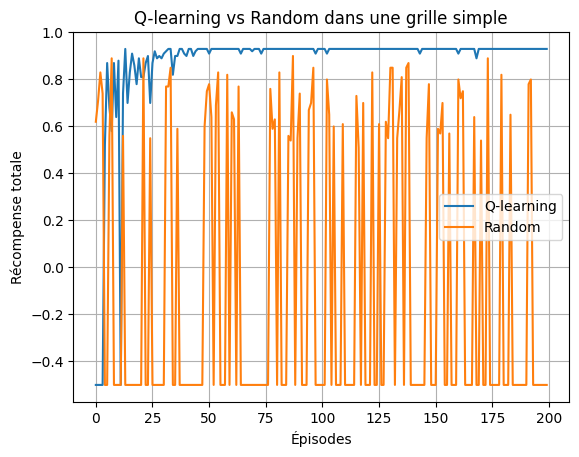

In [1]:
# simple_qlearning_grid.py
import numpy as np
import matplotlib.pyplot as plt
import random

# === Environnement très simple ===
class SimpleGrid:
    def __init__(self, size=5, reward_pos=(4, 4)):
        self.size = size
        self.agent_pos = [0, 0]
        self.reward_pos = reward_pos

    def reset(self):
        self.agent_pos = [0, 0]
        return tuple(self.agent_pos)

    def step(self, action):
        i, j = self.agent_pos
        if action == 0 and i > 0: i -= 1  # haut
        if action == 1 and i < self.size - 1: i += 1  # bas
        if action == 2 and j > 0: j -= 1  # gauche
        if action == 3 and j < self.size - 1: j += 1  # droite
        self.agent_pos = [i, j]
        reward = 1.0 if self.agent_pos == list(self.reward_pos) else -0.01
        done = self.agent_pos == list(self.reward_pos)
        return tuple(self.agent_pos), reward, done

    def get_state(self):
        return tuple(self.agent_pos)

# === Agent Q-Learning ===
class QLearningAgent:
    def __init__(self, state_space, action_space, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.q_table = {}
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def get_qs(self, state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(self.action_space)
        return self.q_table[state]

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_space)
        return int(np.argmax(self.get_qs(state)))

    def learn(self, state, action, reward, next_state, done):
        q_next = 0 if done else np.max(self.get_qs(next_state))
        q_target = reward + self.gamma * q_next
        q_vals = self.get_qs(state)
        q_vals[action] += self.alpha * (q_target - q_vals[action])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# === Entraînement ===
EPISODES = 200
STEPS = 50

# Agent Q-learning
env_q = SimpleGrid()
agent_q = QLearningAgent(state_space=(5, 5), action_space=4)
rewards_q = []

# Agent Random
env_r = SimpleGrid()
rewards_r = []

for ep in range(EPISODES):
    # Q-Learning
    state = env_q.reset()
    total_reward_q = 0
    for step in range(STEPS):
        action = agent_q.select_action(state)
        next_state, reward, done = env_q.step(action)
        agent_q.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward_q += reward
        if done:
            break
    rewards_q.append(total_reward_q)

    # Random
    state_r = env_r.reset()
    total_reward_r = 0
    for step in range(STEPS):
        action_r = np.random.choice(4)
        next_state_r, reward_r, done_r = env_r.step(action_r)
        state_r = next_state_r
        total_reward_r += reward_r
        if done_r:
            break
    rewards_r.append(total_reward_r)

    if (ep+1) % 10 == 0:
        print(f"Épisode {ep+1}, Q-learning: {total_reward_q:.2f}, Random: {total_reward_r:.2f}, epsilon: {agent_q.epsilon:.3f}")

# === Affichage des résultats ===
plt.plot(rewards_q, label='Q-learning')
plt.plot(rewards_r, label='Random')
plt.xlabel("Épisodes")
plt.ylabel("Récompense totale")
plt.title("Q-learning vs Random dans une grille simple")
plt.legend()
plt.grid()
plt.show()


Épisode 10, Q-learning: 0.76, Random: 0.72, epsilon: 0.026
Épisode 20, Q-learning: 0.82, Random: -0.50, epsilon: 0.010
Épisode 30, Q-learning: 0.78, Random: 0.80, epsilon: 0.010
Épisode 40, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 50, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 60, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 70, Q-learning: 0.93, Random: 0.53, epsilon: 0.010
Épisode 80, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 90, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 100, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 110, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 120, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 130, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 140, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 150, Q-learning: 0.93, Random: -0.50, epsilon: 0.010
Épisode 160, Q-learning: 0.93, Random: 0.87, epsilon: 0.010
Épisode 170, Q-learning: 0.93, Random

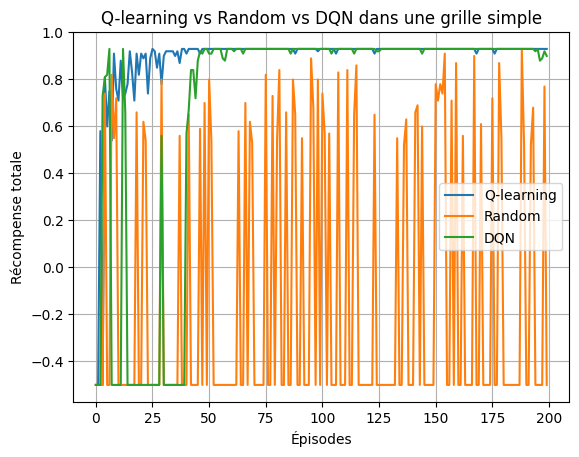

In [3]:
# simple_qlearning_grid.py
import numpy as np
import matplotlib.pyplot as plt
import random

# === Environnement très simple ===
class SimpleGrid:
    def __init__(self, size=5, reward_pos=(4, 4)):
        self.size = size
        self.agent_pos = [0, 0]
        self.reward_pos = reward_pos

    def reset(self):
        self.agent_pos = [0, 0]
        return tuple(self.agent_pos)

    def step(self, action):
        i, j = self.agent_pos
        if action == 0 and i > 0: i -= 1  # haut
        if action == 1 and i < self.size - 1: i += 1  # bas
        if action == 2 and j > 0: j -= 1  # gauche
        if action == 3 and j < self.size - 1: j += 1  # droite
        self.agent_pos = [i, j]
        reward = 1.0 if self.agent_pos == list(self.reward_pos) else -0.01
        done = self.agent_pos == list(self.reward_pos)
        return tuple(self.agent_pos), reward, done

    def get_state(self):
        return tuple(self.agent_pos)

# === Agent Q-Learning ===
class QLearningAgent:
    def __init__(self, state_space, action_space, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.q_table = {}
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def get_qs(self, state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(self.action_space)
        return self.q_table[state]

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_space)
        return int(np.argmax(self.get_qs(state)))

    def learn(self, state, action, reward, next_state, done):
        q_next = 0 if done else np.max(self.get_qs(next_state))
        q_target = reward + self.gamma * q_next
        q_vals = self.get_qs(state)
        q_vals[action] += self.alpha * (q_target - q_vals[action])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# === Agent DQN ===
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import deque

class DQNNet(nn.Module):
    def __init__(self, state_dim=2, action_dim=4):
        super().__init__()
        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

class DQNAgent:
    def __init__(self, state_dim=2, action_dim=4, lr=0.001, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01, batch_size=32):
        self.action_dim = action_dim
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.gamma = gamma
        self.batch_size = batch_size

        self.policy = DQNNet(state_dim, action_dim)
        self.target = DQNNet(state_dim, action_dim)
        self.target.load_state_dict(self.policy.state_dict())
        self.optimizer = optim.Adam(self.policy.parameters(), lr=lr)
        self.memory = deque(maxlen=10000)
        self.steps = 0

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_dim)
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_vals = self.policy(state_tensor)
        return int(torch.argmax(q_vals).item())

    def store(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def train(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions).unsqueeze(1)
        rewards = torch.FloatTensor(rewards).unsqueeze(1)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones).unsqueeze(1)

        q_vals = self.policy(states).gather(1, actions)
        next_q = self.target(next_states).max(1)[0].unsqueeze(1)
        targets = rewards + self.gamma * next_q * (1 - dones)

        loss = F.mse_loss(q_vals, targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        self.steps += 1
        if self.steps % 20 == 0:
            self.target.load_state_dict(self.policy.state_dict())
EPISODES = 200
STEPS = 50

# Agent Q-learning
env_q = SimpleGrid()
agent_q = QLearningAgent(state_space=(5, 5), action_space=4)
rewards_q = []

# Agent Random
env_r = SimpleGrid()
rewards_r = []

# Agent DQN
env_d = SimpleGrid()
agent_d = DQNAgent()
rewards_d = []

for ep in range(EPISODES):
    # Q-Learning
    state = env_q.reset()
    total_reward_q = 0
    for step in range(STEPS):
        action = agent_q.select_action(state)
        next_state, reward, done = env_q.step(action)
        agent_q.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward_q += reward
        if done:
            break
    rewards_q.append(total_reward_q)

    # Random
    state_r = env_r.reset()
    total_reward_r = 0
    for step in range(STEPS):
        action_r = np.random.choice(4)
        next_state_r, reward_r, done_r = env_r.step(action_r)
        state_r = next_state_r
        total_reward_r += reward_r
        if done_r:
            break
    rewards_r.append(total_reward_r)

    # DQN
    state_d = env_d.reset()
    total_reward_d = 0
    for step in range(STEPS):
        action_d = agent_d.select_action(state_d)
        next_state_d, reward_d, done_d = env_d.step(action_d)
        agent_d.store(state_d, action_d, reward_d, next_state_d, done_d)
        agent_d.train()
        state_d = next_state_d
        total_reward_d += reward_d
        if done_d:
            break
    rewards_d.append(total_reward_d)

    if (ep+1) % 10 == 0:
        print(f"Épisode {ep+1}, Q-learning: {total_reward_q:.2f}, Random: {total_reward_r:.2f}, epsilon: {agent_q.epsilon:.3f}")

# === Affichage des résultats ===
plt.plot(rewards_q, label='Q-learning')
plt.plot(rewards_r, label='Random')
plt.plot(rewards_d, label='DQN')
plt.xlabel("Épisodes")
plt.ylabel("Récompense totale")
plt.title("Q-learning vs Random vs DQN dans une grille simple")
plt.legend()
plt.grid()
plt.show()


Épisode 10 | QL: 4.89 | Random: 1.77 | DQN: -2.04
Épisode 20 | QL: 4.10 | Random: -3.56 | DQN: 4.99
Épisode 30 | QL: -2.16 | Random: 2.98 | DQN: -2.12
Épisode 40 | QL: -2.08 | Random: 3.82 | DQN: 4.73
Épisode 50 | QL: 4.98 | Random: 4.79 | DQN: 4.85

===== EXPLOIT utilisé au mauvais moment =====
Q-Learning : 313 fois
Random     : 0 fois
DQN        : 0 fois


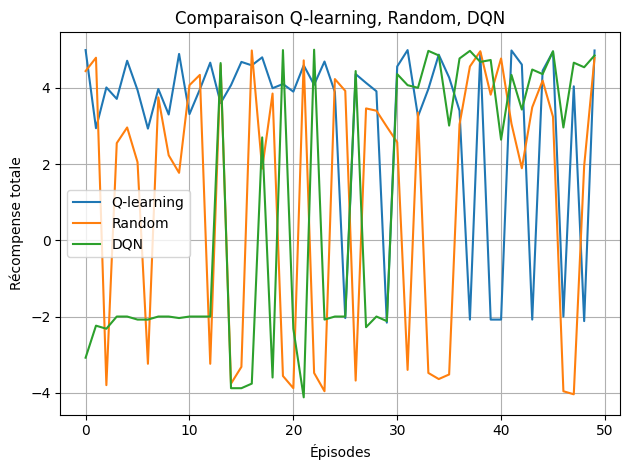

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import deque

# === ENVIRONNEMENT ===
class SimpleGrid:

    def __init__(self, size=5):
        self.size = size
        self.agent_pos = [0, 0]
        self.reward_pos = [np.random.randint(0, size), np.random.randint(0, size)]

    def reset(self):
        self.agent_pos = [0, 0]
        self.reward_pos = [np.random.randint(0, self.size), np.random.randint(0, self.size)]
        return self.get_state()

    def step(self, action):
        i, j = self.agent_pos
        if action == 0 and i > 0: i -= 1
        if action == 1 and i < self.size - 1: i += 1
        if action == 2 and j > 0: j -= 1
        if action == 3 and j < self.size - 1: j += 1
        self.agent_pos = [i, j]

        reward = -0.01  # coût de déplacement
        done = False

        if action == 4:  # "manger"
            if self.agent_pos == self.reward_pos:
                reward = 5.0
                done = True
            else:
                reward = -0.05  # mal mangé

        return self.get_state(), reward, done

    def get_state(self):
        on_reward = int(self.agent_pos == self.reward_pos)
        return np.array([self.agent_pos[0], self.agent_pos[1], on_reward], dtype=np.float32)

# === Q-LEARNING ===
class QLearningAgent:
    def __init__(self, action_space, alpha=0.1, gamma=0.99, epsilon=0.8, epsilon_decay=0.99, epsilon_min=0.01):
        self.q_table = {}
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def get_qs(self, state):
        key = tuple(state)
        if key not in self.q_table:
            self.q_table[key] = np.zeros(self.action_space)
        return self.q_table[key]

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_space)
        return int(np.argmax(self.get_qs(state)))

    def learn(self, state, action, reward, next_state, done):
        q_next = 0 if done else np.max(self.get_qs(next_state))
        target = reward + self.gamma * q_next
        q_vals = self.get_qs(state)
        q_vals[action] += self.alpha * (target - q_vals[action])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# === DQN ===
class DQNNet(nn.Module):
    def __init__(self, state_dim=3, action_dim=5):
        super().__init__()
        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

class DQNAgent:
    def __init__(self, state_dim=3, action_dim=5, lr=0.001, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01, batch_size=32):
        self.action_dim = action_dim
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.gamma = gamma
        self.batch_size = batch_size

        self.policy = DQNNet(state_dim, action_dim)
        self.target = DQNNet(state_dim, action_dim)
        self.target.load_state_dict(self.policy.state_dict())
        self.optimizer = optim.Adam(self.policy.parameters(), lr=lr)
        self.memory = deque(maxlen=10000)
        self.steps = 0

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_dim)
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_vals = self.policy(state_tensor)
        return int(torch.argmax(q_vals).item())

    def store(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def train(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions).unsqueeze(1)
        rewards = torch.FloatTensor(rewards).unsqueeze(1)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones).unsqueeze(1)

        q_vals = self.policy(states).gather(1, actions)
        next_q = self.target(next_states).max(1)[0].unsqueeze(1)
        targets = rewards + self.gamma * next_q * (1 - dones)

        loss = F.mse_loss(q_vals, targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        self.steps += 1
        if self.steps % 20 == 0:
            self.target.load_state_dict(self.policy.state_dict())

# === BOUCLE D’ENTRAÎNEMENT ===
EPISODES = 50
STEPS = 200

env_q = SimpleGrid()
agent_q = QLearningAgent(action_space=5)
rewards_q = []

env_r = SimpleGrid()
rewards_r = []

env_d = SimpleGrid()
agent_d = DQNAgent()
rewards_d = []

bad_exploit_q = 0
bad_exploit_r = 0
bad_exploit_d = 0


for ep in range(EPISODES):
    # QLearning
    state = env_q.reset()
    total_reward_q = 0
    for _ in range(STEPS):
        action = agent_q.select_action(state)
        if action == 4 and state[2] == 0:
            bad_exploit_q += 1
        next_state, reward, done = env_q.step(action)
        agent_q.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward_q += reward
        if done:
            break
    rewards_q.append(total_reward_q)

    # Random
    state_r = env_r.reset()
    total_reward_r = 0
    for _ in range(STEPS):
        action_r = np.random.randint(5)
        if action_r == 4 and state[2] == 0:
            bad_exploit_q += 1
        _, reward_r, done_r = env_r.step(action_r)
        total_reward_r += reward_r
        if done_r:
            break
    rewards_r.append(total_reward_r)

    # DQN
    state_d = env_d.reset()
    total_reward_d = 0
    for _ in range(STEPS):
        action_d = agent_d.select_action(state_d)
        if action_d == 4 and state[2] == 0:
            bad_exploit_q += 1
        next_state_d, reward_d, done_d = env_d.step(action_d)
        if action == 4 and state[2] == 0:
            bad_exploit_d += 1
        agent_d.store(state_d, action_d, reward_d, next_state_d, done_d)
        agent_d.train()
        state_d = next_state_d
        total_reward_d += reward_d
        if done_d:
            break
    rewards_d.append(total_reward_d)

    if (ep+1) % 10 == 0:
        print(f"Épisode {ep+1} | QL: {total_reward_q:.2f} | Random: {total_reward_r:.2f} | DQN: {total_reward_d:.2f}")

# === GRAPHIQUE ===
print("\n===== EXPLOIT utilisé au mauvais moment =====")
print(f"Q-Learning : {bad_exploit_q} fois")
print(f"Random     : {bad_exploit_r} fois")
print(f"DQN        : {bad_exploit_d} fois")

plt.plot(rewards_q, label='Q-learning')
plt.plot(rewards_r, label='Random')
plt.plot(rewards_d, label='DQN')
plt.xlabel("Épisodes")
plt.ylabel("Récompense totale")
plt.title("Comparaison Q-learning, Random, DQN")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
